In [1]:
%pylab inline

import sys
import pandas as pd
import numpy as np
import matplotlib

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [13]:
print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]

matplotlib version: 2.0.2
pandas version: 0.20.3
numpy version: 1.13.1
seaborn version: 0.9.0


###  Citations received in 2015 by document type published in 2013 and 2014

In [2]:
citations_data = pd.read_csv('data/journals_citations_data.csv')
citations_data.head()

,Citations,eLife,Nature,Nature Comm.,PLOS Biol.,PLOS Genet.,PLOS ONE,Science,Sci. Rep.
0,0,56.0,11.0,171.0,19.0,98.0,12624.0,28.0,926.0
1,1,51.0,5.0,267.0,25.0,169.0,13293.0,15.0,1029.0
2,2,59.0,13.0,334.0,34.0,171.0,10494.0,18.0,941.0
3,3,83.0,21.0,369.0,39.0,185.0,7980.0,26.0,751.0
4,4,77.0,23.0,345.0,36.0,181.0,5377.0,38.0,590.0


In [3]:
citations_data.fillna(0, inplace=True)

In [4]:
journals = ['eLife', 'Nature', 'Nature Comm.', 
                  'PLOS Biol.','PLOS Genet.', 'PLOS ONE', 'Science', 'Sci. Rep.']

In [5]:
long_format = pd.melt(citations_data, id_vars = 'Citations',
                      value_vars= journals, var_name='journal', value_name='nr_articles')
long_format.journal.unique()

array(['eLife', 'Nature', 'Nature Comm.', 'PLOS Biol.', 'PLOS Genet.',
       'PLOS ONE', 'Science', 'Sci. Rep.'], dtype=object)

In [6]:
long_format.head()

,Citations,journal,nr_articles
0,0,eLife,56.0
1,1,eLife,51.0
2,2,eLife,59.0
3,3,eLife,83.0
4,4,eLife,77.0


In [7]:
long_format.columns = ['nr_citations', 'journal', 'nr_articles']

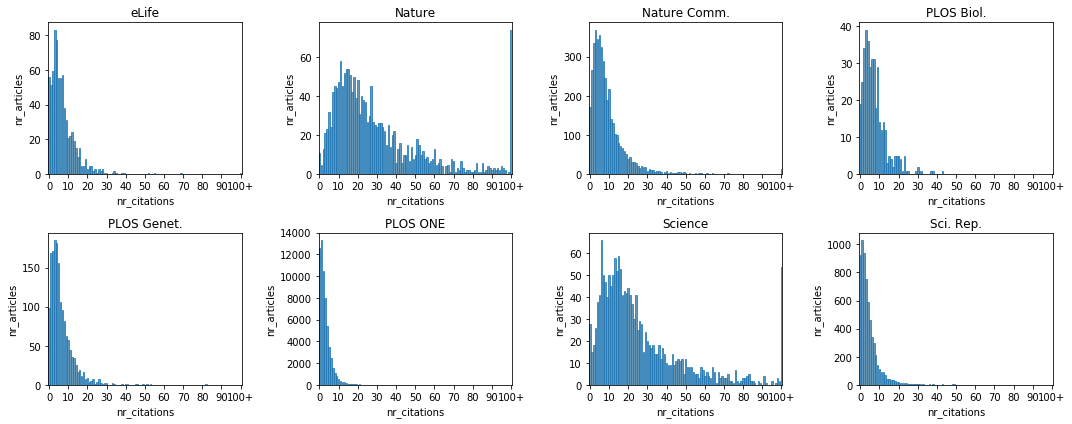

In [8]:
xticks = ['0','10','20','30', '40', '50', '60', '70', '80', '90', '100+']
x= np.arange(0, 110, 10)

fig, axs = plt.subplots(2, 4, figsize=(15,6))
axs = axs.flatten()
for ax, j in zip(axs, long_format.journal.unique()):
    ax.set_title(j)
    tmp = long_format[long_format.journal==j]
    sns.barplot(x="nr_citations", y="nr_articles", data=tmp, ax=ax, color='C0', edgecolor='C0', alpha=.75)
    plt.sca(ax)
    plt.xticks(x, xticks)
    
plt.tight_layout();

-  The most cited articles in Nature and Science are cited 905 times and 694 times respectively in 2015

In [9]:
colors = ['C0', 'C1']
colors_line = ['#010fcc', '#ff5b00']

### load the 2015 JIF values

In [11]:
JIF = pd.read_csv('data/JIF_2015.csv')
JIF

,journal,JIF,pctg citable items below JIF
0,eLife,8.3,71.2
1,Nature,38.1,74.8
2,Nature Comm.,11.3,74.1
3,PLOS Biol.,8.7,66.8
4,PLOS Genet.,6.7,65.3
5,PLOS ONE,3.1,72.2
6,Science,34.7,75.5
7,Sci. Rep.,5.2,73.2


In [15]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()

### Panel A - overview of citations distributions 

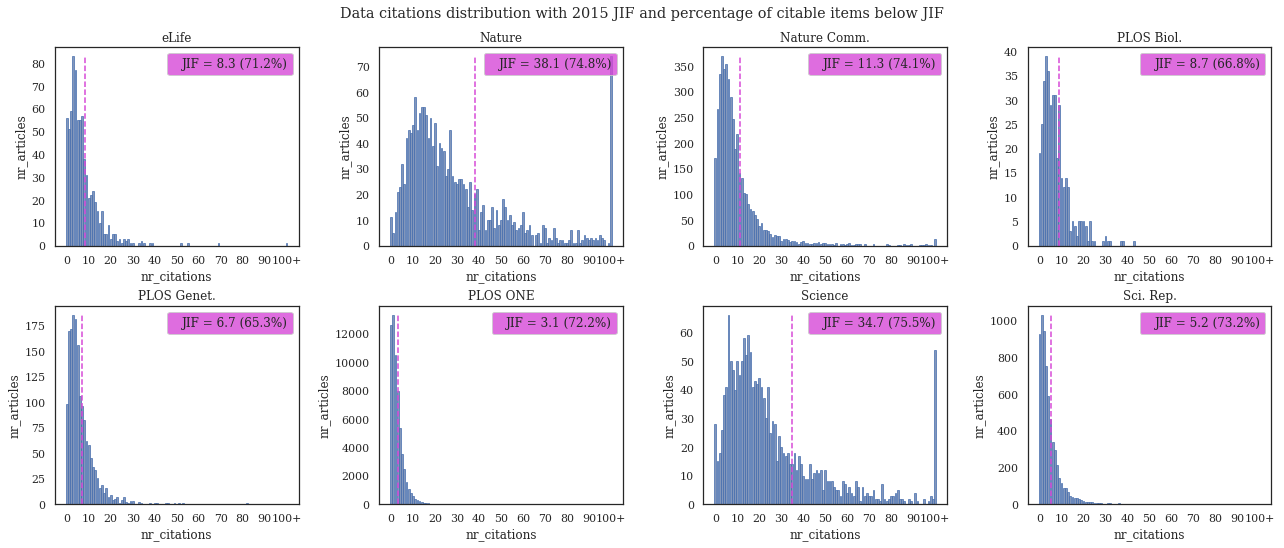

In [33]:
xticks = ['0','10','20','30', '40', '50', '60', '70', '80', '90', '100+']
x= np.arange(0, 110, 10)

fig, axs = plt.subplots(2, 4, figsize=(18,8))
axs = axs.flatten()

for ax, j in zip(axs, long_format.journal.unique()):
    ax.set_title(j)
    
    tmp = long_format[long_format.journal==j]
    jif = JIF[JIF.journal==j]["JIF"].values[0]
    
    pctg_citable_items_below_jif = JIF[JIF.journal==j]["pctg citable items below JIF"].values[0]
    t = 'JIF = {} ({}%)'.format(jif, pctg_citable_items_below_jif)

    sns.barplot(x="nr_citations", y="nr_articles", data=tmp, ax=ax, color='C0', edgecolor='C0',
                alpha=.75)
    ax.vlines(x=jif, linestyle='--',  ymin=0, ymax=tmp['nr_articles'].max(), color='#d648d7', label=t)
    
    plt.sca(ax)
    plt.xticks(x, xticks)
    l_=ax.legend(fontsize=12, frameon=True, handlelength=0, loc='upper right')
    f_ = l_.get_frame()
    f_.set_facecolor('#d648d7')
plt.suptitle("Data citations distribution with 2015 JIF and percentage of citable items below JIF", y=0.95)

plt.tight_layout()
plt.subplots_adjust(top=0.88)


plt.savefig('output/Figure_3_A.pdf', format='pdf', dpi=1000)

### Panel B - detail of 2 journals

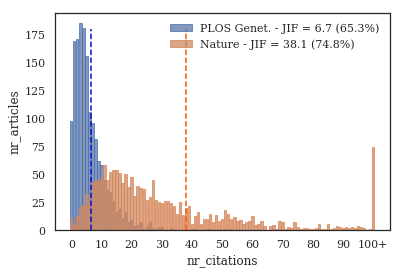

In [32]:
sub = ['PLOS Genet.', 'Nature']
for i, j in enumerate(sub):
    tmp = long_format[long_format.journal==j]
    jif = JIF[JIF.journal==j]["JIF"].values[0]   
    pctg_citable_items_below_jif = JIF[JIF.journal==j]["pctg citable items below JIF"].values[0]
    t = '{} - JIF = {} ({}%)'.format(j, jif, pctg_citable_items_below_jif)
    
    sns.barplot(x="nr_citations", y="nr_articles", data=tmp, color= colors[i],label=t,
                edgecolor=colors[i], alpha=.75)
    plt.vlines(x=jif, linestyle='--',  ymin=0, ymax=180,   color=colors_line[i])
    
plt.legend(frameon=False)
plt.xticks(x, xticks)
plt.savefig('output/Figure_3_B.pdf', format='pdf', dpi=1000)